In [1]:
import pandas as pd
import numpy as np
from scipy import stats

from matplotlib import pyplot as plt
plt.style.use('ggplot')

import seaborn as sns
from scipy.stats import pearsonr

In [48]:
df = pd.read_csv('../house-prices-advanced-regression-techniques/train.csv')

In [49]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gas

In [46]:
df[0:10]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

# Land Variables

In [54]:
land_df = df[['LotArea', 'LotFrontage', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 
              'Neighborhood', 'Condition1', 'Condition2', 'SalePrice']]

In [55]:
land_df

,LotArea,LotFrontage,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,SalePrice
0,8450,65.0,Pave,NaN,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,208500
1,9600,80.0,Pave,NaN,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,181500
2,11250,68.0,Pave,NaN,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,223500
3,9550,60.0,Pave,NaN,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,140000
4,14260,84.0,Pave,NaN,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,250000
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,62.0,Pave,NaN,Reg,Lvl,Inside,Gtl,Gilbert,Norm,Norm,175000
1456,13175,85.0,Pave,NaN,Reg,Lvl,Inside,Gtl,NWAmes,Norm,Norm,210000
1457,9042,66.0,Pave,NaN,Reg,Lvl,Inside,Gtl,Crawfor,Norm,Norm,266500
1458,9717,68.0,Pave,NaN,Reg,Lvl,Inside,Gtl,NAmes,Norm,Norm,142125


Column, percent of highest populated category

*LotArea (continuous)

*LotFrontage(continuous) #must impute 0 for NA

-Street -> 100% #delete

-Alley -> 94% N/A #delete

*LotShape -> 63%

LandContour -> 90%

*LotConfig -> 72% (corner, inside of block)

LandSlope -> 95% # 3 choices

*Neighborhood -> 15%

$Condition1 -> 86%

$Condition2 -> 99% #combine with condition1

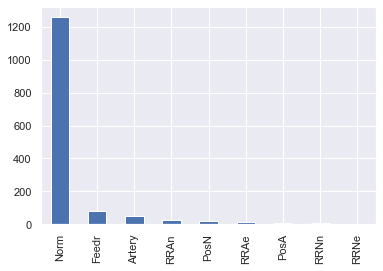

In [43]:
land_df['Condition1'].value_counts().plot(kind='bar')
land_df['Condition1'].value_counts().plot(kind='bar')

In [56]:
#Impute LotFrontage missing values

#land_df[np.isnan(land_df['LotFrontage'])] = 0
land_df['LotFrontage'] = land_df['LotFrontage'].fillna(0)
land_df[0:10]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,LotArea,LotFrontage,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,SalePrice
0,8450,65.0,Pave,NaN,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,208500
1,9600,80.0,Pave,NaN,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,181500
2,11250,68.0,Pave,NaN,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,223500
3,9550,60.0,Pave,NaN,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,140000
4,14260,84.0,Pave,NaN,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,250000
5,14115,85.0,Pave,NaN,IR1,Lvl,Inside,Gtl,Mitchel,Norm,Norm,143000
6,10084,75.0,Pave,NaN,Reg,Lvl,Inside,Gtl,Somerst,Norm,Norm,307000
7,10382,0.0,Pave,NaN,IR1,Lvl,Corner,Gtl,NWAmes,PosN,Norm,200000
8,6120,51.0,Pave,NaN,Reg,Lvl,Inside,Gtl,OldTown,Artery,Norm,129900
9,7420,50.0,Pave,NaN,Reg,Lvl,Corner,Gtl,BrkSide,Artery,Artery,118000


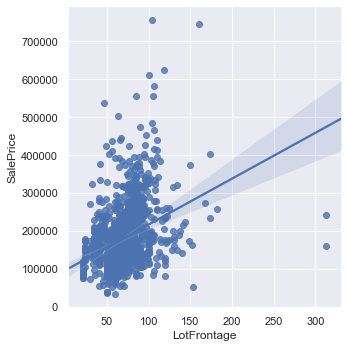

In [57]:
sns.set()

sns.lmplot(x='LotFrontage', y='SalePrice', data=df)

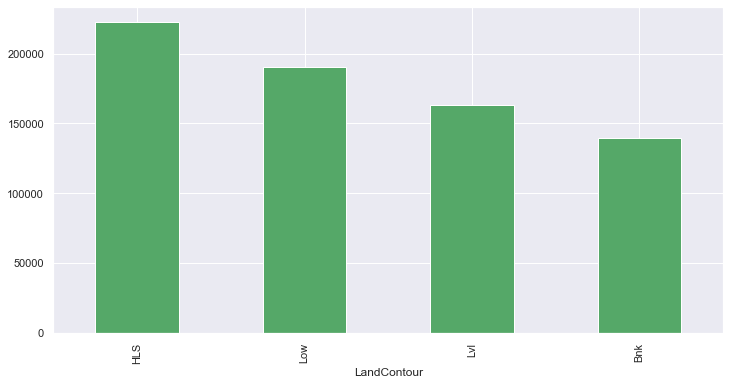

In [75]:
plt.figure(figsize=(12,6))
land_df.groupby('LandContour')['SalePrice'].median().sort_values(ascending=False).plot.bar(color='g')

In [59]:
corr_matrix = land_df.corr(method='pearson')
corr_matrix

,LotArea,LotFrontage,SalePrice
LotArea,1.000000,0.100739,0.263843
LotFrontage,0.100739,1.000000,0.209624
SalePrice,0.263843,0.209624,1.000000


In [282]:
#land_df_feats = land_df[['LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2']]

#land_dummy = pd.get_dummies(land_df_feats, drop_first=True)

#land_dummy

,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,...,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRNn
0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1456,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1457,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1458,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [25]:
pd.set_option('display.max_columns', None)

In [78]:
shape = pd.get_dummies(land_df['LotShape'], prefix='LotShape', prefix_sep='_')
shape = shape.drop('LotShape_IR3', axis=1)

contour = pd.get_dummies(land_df['LandContour'], prefix='LandContour', prefix_sep='_')
contour = contour.drop('LandContour_Bnk', axis=1)

config = pd.get_dummies(land_df['LotConfig'], prefix='LotConfig', prefix_sep='_')
config = config.drop('LotConfig_FR3', axis=1)

slope = pd.get_dummies(land_df['LandSlope'],  prefix='LandSlope', prefix_sep='_')
slope = slope.drop('LandSlope_Mod', axis=1)

neigh = pd.get_dummies(land_df['Neighborhood'], prefix='Neighborhood', prefix_sep='_')
neigh = neigh.drop('Neighborhood_SWISU', axis=1)

cond1 = pd.get_dummies(land_df['Condition1'], prefix='Condition1', prefix_sep='_')
cond1 = cond1.drop('Condition1_Artery', axis=1)

cond2 = pd.get_dummies(land_df['Condition2'], prefix='Condition2', prefix_sep='_')
cond2 = cond2.drop('Condition2_RRNn', axis=1)


In [79]:
land_df_cont = land_df[['LotArea', 'LotFrontage', 'SalePrice']]

land_df_dum = pd.concat([land_df_cont, shape, contour, config, slope, neigh, cond1, cond2], axis=1)
land_df_dum


,LotArea,LotFrontage,SalePrice,LotShape_IR1,LotShape_IR2,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_Inside,LandSlope_Gtl,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn
0,8450,65.0,208500,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,9600,80.0,181500,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,11250,68.0,223500,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,9550,60.0,140000,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
4,14260,84.0,250000,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,62.0,175000,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1456,13175,85.0,210000,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1457,9042,66.0,266500,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1458,9717,68.0,142125,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [80]:
print(list(land_dummy_df.columns))

['LotArea', 'LotFrontage', 'SalePrice', 'LotShape_IR1', 'LotShape_IR2', 'LotShape_Reg', 'LotConfig_Corner', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_Inside', 'LandSlope_Gtl', 'LandSlope_Sev', 'Neighborhood_Blmngtn', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'Condition1_Feedr', 'Condition1_Norm', 'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe', 'Condition1_RRAn', 'Condition1_RRNe', 'Condition1_RRNn', 'Condition2_Artery', 'Condition2_Feedr', 'Condition2_Norm', 'Condition2_PosA',

In [70]:
corr_matrix = land_df_dum.corr(method='pearson')
corr_matrix

,LotArea,LotFrontage,SalePrice,LotShape_IR1,LotShape_IR2,LotShape_Reg,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_Inside,LandSlope_Gtl,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn
LotArea,1.000000,0.100739,0.263843,0.097235,0.225160,-0.216111,0.042722,0.179440,-0.002167,-0.132773,-0.310711,0.540380,-0.077438,-0.033006,-0.091949,-0.064342,0.285316,-0.030444,0.024652,-0.008103,0.020670,-0.038910,-0.089123,0.020684,-0.016124,-0.057221,0.030277,0.063068,0.008776,-0.067048,-0.001333,-0.012197,-0.067096,0.002052,0.215400,0.044440,0.005168,-0.024955,0.045346,0.025502,0.010452,0.019779,-0.004250,-0.008637,-0.005565,-0.010970,-0.018044,0.007827,0.062849,0.021970,0.002580
LotFrontage,0.100739,1.000000,0.209624,-0.158195,-0.044693,0.153770,0.089343,-0.219099,-0.068566,0.067980,0.021940,-0.069666,-0.058886,-0.035937,-0.109541,-0.041406,-0.076159,0.025292,0.000561,0.040196,-0.055762,-0.000888,-0.103659,-0.032984,0.068801,-0.073892,-0.049744,0.080094,0.157940,0.024599,-0.062277,0.017588,0.007421,-0.028428,0.026606,-0.049340,0.037259,-0.046871,0.048467,-0.063456,-0.018939,0.013868,-0.020974,0.017216,0.022313,0.022017,-0.026981,0.013128,0.068807,-0.043535,-0.043535
SalePrice,0.263843,0.209624,1.000000,0.223284,0.126096,-0.267672,0.004145,0.141818,-0.006859,-0.080538,-0.051116,0.027998,0.019066,-0.020250,-0.101303,-0.143648,0.055718,0.072626,0.071160,-0.179949,0.035940,-0.164056,-0.112544,-0.057845,-0.188513,-0.037910,0.023483,0.330424,0.402149,-0.192189,-0.128394,0.014560,0.140058,0.215363,0.126236,0.063471,-0.117329,0.112968,0.042017,0.049541,-0.046651,0.005893,0.004584,0.023236,-0.034708,-0.048335,0.030676,0.047497,0.048481,0.002993,-0.014510
LotShape_IR1,0.097235,-0.158195,0.223284,1.000000,-0.119701,-0.925959,0.075015,0.271735,-0.004788,-0.209930,-0.065622,0.041669,-0.076434,-0.026082,-0.074127,-0.031491,0.039440,0.015689,0.064133,-0.093031,0.172428,-0.095037,-0.076434,0.030345,-0.034612,-0.018283,0.045396,0.109278,0.048652,-0.144071,0.042905,-0.011518,-0.064945,0.097711,0.104201,0.073250,-0.018128,0.035128,0.026567,0.009004,-0.010879,0.026192,0.052594,0.058339,0.013256,0.068478,-0.086967,-0.018436,0.013256,0.037177,0.037177
LotShape_IR2,0.225160,-0.044693,0.126096,-0.119701,1.000000,-0.223509,0.006628,0.191897,0.086440,-0.143599,-0.107106,0.116288,-0.018450,-0.006296,-0.017893,-0.034573,0.127375,0.079030,-0.032339,-0.046093,0.087624,-0.001030,-0.018450,-0.031676,-0.061071,-0.013387,-0.019974,0.046391,-0.021560,-0.033718,-0.020376,-0.013829,0.027909,0.041479,-0.001748,0.033134,-0.004974,-0.028741,0.043545,0.053644,-0.014810,0.008460,-0.006296,0.061002,-0.006296,-0.010919,0.017319,-0.004450,-0.006296,-0.004450,-0.004450
LotShape_Reg,-0.216111,0.153770,-0.267672,-0.925959,-0.223509,1.000000,-0.076297,-0.339139,-0.022368,0.258160,0.103781,-0.094368,0.082546,0.028167,0.080054,0.045513,-0.080220,-0.042298,-0.048866,0.104923,-0.220242,0.095498,0.082546,-0.016137,0.056886,0.023573,-0.034242,-0.120256,-0.036787,0.151118,-0.031648,0.011693,0.057440,-0.107811,-0.107811,-0.081688,0.016652,-0.009458,-0.039832,-0.038101,0.016946,-0.048073,-0.048700,-0.077081,-0.010267,-0.062247,0.077582,0.019910,-0.010267,-0.034424,-0.034424
LotConfig_Corner,0.042722,0.089343,0.004145,0.075015,0.006628,-0.076297,1.000000,-0.122962,-0.085489,-0.752677,0.0241

In [81]:
# Regression with all current features
from sklearn import linear_model
ols = linear_model.LinearRegression()

x_m = land_df_dum.drop('SalePrice', axis=1)
y_m = land_df_dum['SalePrice']

ols.fit(x_m, y_m)

print("beta_1, beta_2: " + str(np.round(ols.coef_, 3)))
print("beta_0: " + str(np.round(ols.intercept_, 3)))
print("RSS: %.2f" % np.sum((ols.predict(x_m) - y_m) ** 2))
print("R^2: %.5f" % ols.score(x_m, y_m))

beta_1, beta_2: [ 1.61900000e+00  2.98556000e+02  2.30638460e+04  2.58056130e+04
  1.16060630e+04  2.63526310e+04  2.35786000e+02  1.87903740e+04
  4.54627560e+04  5.96067010e+04  2.87829440e+04  4.23197950e+04
 -1.71841500e+04 -8.59737810e+04  5.54133750e+04  5.33903100e+03
 -2.72244450e+04 -2.42408290e+04  4.06369720e+04  3.49622720e+04
  4.16064820e+04 -2.99412950e+04  2.61357210e+04 -5.16292060e+04
 -3.48742840e+04 -7.91950100e+03 -1.61802740e+04  6.15122600e+03
  2.14352660e+04  1.56410173e+05  1.47790784e+05 -2.44668910e+04
 -2.09603840e+04  2.93607880e+04  6.91855540e+04  1.40034322e+05
  5.66210110e+04  7.45555000e+04 -9.70997600e+03  4.97557100e+03
  3.60037230e+04  5.00175990e+04 -1.52989010e+04  9.45787200e+03
 -4.19157600e+03  3.99982820e+04 -2.76908000e+03  1.57099970e+04
  2.98714270e+04  2.17700180e+05  1.12165970e+04  9.11108000e+04
  4.44207400e+03]
beta_0: 31985.569
RSS: 3528817820904.71
R^2: 0.61676


In [82]:
# Regression using train_test_split for accurate predictions

from sklearn.model_selection import train_test_split

ols = linear_model.LinearRegression()

x_m = land_df_dum.drop('SalePrice', axis=1)
y_m = land_df_dum['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(x_m, y_m, test_size=0.3, random_state=42)
ols.fit(X_train, y_train)

print("R^2 for train set: %f" %ols.score(X_train, y_train))

print('-'*50)

print("R^2 for test  set: %f" %ols.score(X_test, y_test))

R^2 for train set: 0.607224
--------------------------------------------------
R^2 for test  set: 0.612251


In [86]:
# Regression without LandContour, LandSlope, Condition2
ols = linear_model.LinearRegression()

land_df_dum = pd.concat([land_df_cont, shape, config, slope, neigh, cond1, cond2], axis=1)
land_df_dum

land_dum2 = pd.concat([shape, config, neigh, cond1, land_df_cont], axis=1)

x_m = land_dum2.drop('SalePrice', axis=1)

X_train, X_test, y_train, y_test = train_test_split(x_m, y_m, test_size=0.3, random_state=42)
ols.fit(X_train, y_train)

print("R^2 for train set: %f" %ols.score(X_train, y_train))

print('-'*50)

print("R^2 for test  set: %f" %ols.score(X_test, y_test))

land_df_dum_final = land_dum2

R^2 for train set: 0.592572
--------------------------------------------------
R^2 for test  set: 0.612834


In [85]:
# Regression without LandContour, LandSlope, Condition2, LotShape, LotConfig, Condition1 ->
# R^2 not as high as previous block, so keep some more features

ols = linear_model.LinearRegression()

land_dum3 = pd.concat([land_df_cont, neigh], axis = 1)

x_m = land_dum3.drop('SalePrice', axis=1)

X_train, X_test, y_train, y_test = train_test_split(x_m, y_m, test_size=0.3, random_state=42)
ols.fit(X_train, y_train)

print("R^2 for train set: %f" %ols.score(X_train, y_train))

print('-'*50)

print("R^2 for test  set: %f" %ols.score(X_test, y_test))

R^2 for train set: 0.573632
--------------------------------------------------
R^2 for test  set: 0.596170


In [87]:
land_final = land_df_dum_final
land_final

,LotShape_IR1,LotShape_IR2,LotShape_Reg,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,LotArea,LotFrontage,SalePrice
0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,8450,65.0,208500
1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,9600,80.0,181500
2,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,11250,68.0,223500
3,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,9550,60.0,140000
4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,14260,84.0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7917,62.0,175000
1456,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,13175,85.0,210000
1457,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,9042,66.0,266500
1458,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,9717,68.0,142125


# Exterior Variables

In [88]:
ext_df = df[['PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'SalePrice']]
ext_df

,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,SalePrice
0,Y,0,61,0,0,0,0,NaN,NaN,208500
1,Y,298,0,0,0,0,0,NaN,NaN,181500
2,Y,0,42,0,0,0,0,NaN,NaN,223500
3,Y,0,35,272,0,0,0,NaN,NaN,140000
4,Y,192,84,0,0,0,0,NaN,NaN,250000
...,...,...,...,...,...,...,...,...,...,...
1455,Y,0,40,0,0,0,0,NaN,NaN,175000
1456,Y,349,0,0,0,0,0,NaN,MnPrv,210000
1457,Y,0,60,0,0,0,0,NaN,GdPrv,266500
1458,Y,366,0,112,0,0,0,NaN,NaN,142125


WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch

PoolArea - 7 houses have a pool. Change to binary feature
PoolQC - ~100% N/A #delete or add to PoolArea as score
Fence - 81% N/A #change to numeric - fence present or not
PavedDrive - 94% have driveway ('Y'/'P')

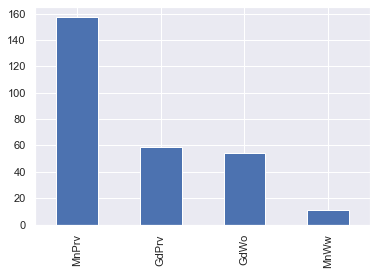

In [89]:
ext_df['Fence'].value_counts().plot(kind='bar')


In [90]:
ext_df['PavedDrive'] = ext_df['PavedDrive'].replace('Y', 1)
ext_df['PavedDrive'] = ext_df['PavedDrive'].replace('N', 0)
ext_df['PavedDrive'] = ext_df['PavedDrive'].replace('P', 1)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [91]:
ext_df[0:20]

,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,SalePrice
0,1,0,61,0,0,0,0,NaN,NaN,208500
1,1,298,0,0,0,0,0,NaN,NaN,181500
2,1,0,42,0,0,0,0,NaN,NaN,223500
3,1,0,35,272,0,0,0,NaN,NaN,140000
4,1,192,84,0,0,0,0,NaN,NaN,250000
5,1,40,30,0,320,0,0,NaN,MnPrv,143000
6,1,255,57,0,0,0,0,NaN,NaN,307000
7,1,235,204,228,0,0,0,NaN,NaN,200000
8,1,90,0,205,0,0,0,NaN,NaN,129900
9,1,0,4,0,0,0,0,NaN,NaN,118000


In [92]:
df_YP = ext_df[ext_df['PavedDrive']==1]
df_N = ext_df[ext_df['PavedDrive']==0]
stats.f_oneway(df_YP['SalePrice'],
               df_N['SalePrice'])

F_onewayResult(statistic=69.03963713991038, pvalue=2.1809809742553336e-16)

In [93]:
print(df_YP['SalePrice'].median())
print(df_N['SalePrice'].median())

167370.0
111000.0


In [94]:
ext_df['Fence'] = ext_df['Fence'].replace('MnPrv', 1)
ext_df['Fence'] = ext_df['Fence'].replace('GdPrv', 1)
ext_df['Fence'] = ext_df['Fence'].replace('GdWo', 1)
ext_df['Fence'] = ext_df['Fence'].replace('MnWw', 1)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [95]:
ext_df

,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,SalePrice
0,1,0,61,0,0,0,0,NaN,NaN,208500
1,1,298,0,0,0,0,0,NaN,NaN,181500
2,1,0,42,0,0,0,0,NaN,NaN,223500
3,1,0,35,272,0,0,0,NaN,NaN,140000
4,1,192,84,0,0,0,0,NaN,NaN,250000
...,...,...,...,...,...,...,...,...,...,...
1455,1,0,40,0,0,0,0,NaN,NaN,175000
1456,1,349,0,0,0,0,0,NaN,1.0,210000
1457,1,0,60,0,0,0,0,NaN,1.0,266500
1458,1,366,0,112,0,0,0,NaN,NaN,142125


In [96]:
# Change NA's in whole dataframe to 0s
ext_df = ext_df.fillna(0)

In [97]:
df_fence = ext_df[ext_df['Fence']==1]
df_noFence = ext_df[ext_df['Fence']==0]

In [98]:
df_fence

,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,SalePrice
5,1,40,30,0,320,0,0,0,1.0,143000
14,1,0,213,176,0,0,0,0,1.0,157000
15,1,48,112,0,0,0,0,0,1.0,132000
19,1,0,0,0,0,0,0,0,1.0,139000
21,0,0,0,205,0,0,0,0,1.0,139400
...,...,...,...,...,...,...,...,...,...,...
1436,1,0,0,0,0,0,0,0,1.0,120500
1438,1,0,158,158,0,0,0,0,1.0,149700
1448,1,168,24,0,0,0,0,0,1.0,112000
1456,1,349,0,0,0,0,0,0,1.0,210000


In [99]:
df_fence = ext_df[ext_df['Fence']==1]
df_noFence = ext_df[ext_df['Fence']==0]
stats.f_oneway(df_fence['SalePrice'],
               df_noFence['SalePrice'])

# F test shows significance in having fence ..? pearson R doesn't. 

F_onewayResult(statistic=44.5464616151814, pvalue=3.5191638769810705e-11)

In [100]:
print(df_fence['SalePrice'].median())
print(df_noFence['SalePrice'].median())

141500.0
173000.0


In [101]:
df_hasPool = ext_df[ext_df['PoolArea']>0]
df_NoPool = ext_df[ext_df['PoolArea']==0]
stats.f_oneway(df_hasPool['SalePrice'],
               df_NoPool['SalePrice'])

F_onewayResult(statistic=12.916430057647602, pvalue=0.00033655238143023933)

In [102]:
# impute 0,1 for PoolArea
df_hasPool = ext_df[ext_df['PoolArea']>0]
df_hasPool['PoolArea'] = 1

df_hasPool
ext_df = pd.concat([df_hasPool, df_NoPool])
ext_df.drop('PoolQC', axis=1, inplace=True)
ext_df

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,SalePrice
197,1,0,16,552,0,0,1,1.0,235000
810,1,265,0,0,0,0,1,1.0,181000
1170,1,203,0,0,0,0,1,1.0,171000
1182,1,171,78,0,0,0,1,1.0,745000
1298,1,214,292,0,0,0,1,0.0,160000
...,...,...,...,...,...,...,...,...,...
1455,1,0,40,0,0,0,0,0.0,175000
1456,1,349,0,0,0,0,0,1.0,210000
1457,1,0,60,0,0,0,0,1.0,266500
1458,1,366,0,112,0,0,0,0.0,142125


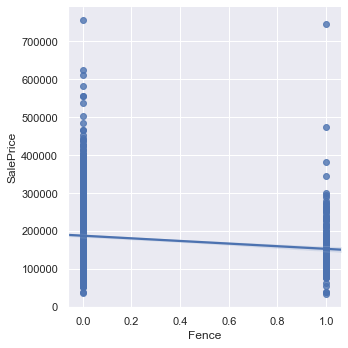

In [103]:
sns.set()

sns.lmplot(x='Fence', y='SalePrice', data=ext_df)

In [105]:
corr_matrix = ext_df.corr(method='pearson')
corr_matrix

,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,SalePrice
PavedDrive,1.000000,0.106077,0.021474,-0.184679,0.016214,0.050658,0.017790,-0.019346,0.212630
WoodDeckSF,0.106077,1.000000,0.058661,-0.125989,-0.032771,-0.074181,0.061671,0.036014,0.324413
OpenPorchSF,0.021474,0.058661,1.000000,-0.093079,-0.005842,0.074304,0.060987,-0.060319,0.315856
EnclosedPorch,-0.184679,-0.125989,-0.093079,1.000000,-0.037305,-0.082864,0.064643,0.070005,-0.128578
3SsnPorch,0.016214,-0.032771,-0.005842,-0.037305,1.000000,-0.031436,-0.008075,0.007464,0.044584
ScreenPorch,0.050658,-0.074181,0.074304,-0.082864,-0.031436,1.000000,0.059519,0.008100,0.111447
PoolArea,0.017790,0.061671,0.060987,0.064643,-0.008075,0.059519,1.000000,0.117023,0.093708
Fence,-0.019346,0.036014,-0.060319,0.070005,0.007464,0.008100,0.117023,1.000000,-0.172184
SalePrice,0.212630,0.324413,0.315856,-0.128578,0.044584,0.111447,0.093708,-0.172184,1.000000


In [106]:
ols = linear_model.LinearRegression()

x_m = ext_df[['WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']]

#x_m = ext_df.drop('SalePrice', axis=1)
y_m = ext_df['SalePrice']

ols.fit(x_m, y_m)

print("beta_1, beta_2: " + str(np.round(ols.coef_, 3)))
print("beta_0: " + str(np.round(ols.intercept_, 3)))
print("RSS: %.2f" % np.sum((ols.predict(x_m) - y_m) ** 2))
print("R^2: %.5f" % ols.score(x_m, y_m))

beta_1, beta_2: [197.338 341.598 -66.91  157.214 158.054]
beta_0: 144936.552
RSS: 7250678782019.27
R^2: 0.21256


In [107]:
ext_df['PorchSF'] = ext_df['WoodDeckSF'] + ext_df['OpenPorchSF'] + ext_df['EnclosedPorch'] + ext_df['3SsnPorch'] + ext_df['ScreenPorch']
ext_df

,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,SalePrice,PorchSF
197,1,0,16,552,0,0,1,1.0,235000,568
810,1,265,0,0,0,0,1,1.0,181000,265
1170,1,203,0,0,0,0,1,1.0,171000,203
1182,1,171,78,0,0,0,1,1.0,745000,249
1298,1,214,292,0,0,0,1,0.0,160000,506
...,...,...,...,...,...,...,...,...,...,...
1455,1,0,40,0,0,0,0,0.0,175000,40
1456,1,349,0,0,0,0,0,1.0,210000,349
1457,1,0,60,0,0,0,0,1.0,266500,60
1458,1,366,0,112,0,0,0,0.0,142125,478


In [108]:
ext_df['Porch_Score'] = ext_df['WoodDeckSF']*197.338 + ext_df['OpenPorchSF']*341.598 + ext_df['EnclosedPorch'] * -66.91 + ext_df['3SsnPorch'] * 157.214 + ext_df['ScreenPorch'] * 158.054
                
ext_df

,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,SalePrice,PorchSF,Porch_Score
197,1,0,16,552,0,0,1,1.0,235000,568,-31468.752
810,1,265,0,0,0,0,1,1.0,181000,265,52294.570
1170,1,203,0,0,0,0,1,1.0,171000,203,40059.614
1182,1,171,78,0,0,0,1,1.0,745000,249,60389.442
1298,1,214,292,0,0,0,1,0.0,160000,506,141976.948
...,...,...,...,...,...,...,...,...,...,...,...
1455,1,0,40,0,0,0,0,0.0,175000,40,13663.920
1456,1,349,0,0,0,0,0,1.0,210000,349,68870.962
1457,1,0,60,0,0,0,0,1.0,266500,60,20495.880
1458,1,366,0,112,0,0,0,0.0,142125,478,64731.788


In [109]:
# F test with compiled porch score

ols = linear_model.LinearRegression()

x_m = ext_df[['Porch_Score']]

y_m = ext_df['SalePrice']

ols.fit(x_m, y_m)

print("beta_1, beta_2: " + str(np.round(ols.coef_, 3)))
print("beta_0: " + str(np.round(ols.intercept_, 3)))
print("RSS: %.2f" % np.sum((ols.predict(x_m) - y_m) ** 2))
print("R^2: %.5f" % ols.score(x_m, y_m))

beta_1, beta_2: [1.]
beta_0: 144936.561
RSS: 7250678782020.82
R^2: 0.21256


In [110]:
# F test with PorchSF feature (unweighted compilation of total square feet of porches)

ols = linear_model.LinearRegression()

x_m = ext_df[['PorchSF']]

y_m = ext_df['SalePrice']

ols.fit(x_m, y_m)

print("beta_1, beta_2: " + str(np.round(ols.coef_, 3)))
print("beta_0: " + str(np.round(ols.intercept_, 3)))
print("RSS: %.2f" % np.sum((ols.predict(x_m) - y_m) ** 2))
print("R^2: %.5f" % ols.score(x_m, y_m))

beta_1, beta_2: [198.278]
beta_0: 144967.547
RSS: 7800246898920.60
R^2: 0.15288


In [111]:
# Final cleaning of ext_df
#ext_df.drop('Fence', axis=1, inplace=True)
ext_df = ext_df.rename(columns={"PoolArea": "Pool"})
ext_df.drop('PorchSF', axis=1, inplace=True)
ext_df

,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Pool,Fence,SalePrice,Porch_Score
197,1,0,16,552,0,0,1,1.0,235000,-31468.752
810,1,265,0,0,0,0,1,1.0,181000,52294.570
1170,1,203,0,0,0,0,1,1.0,171000,40059.614
1182,1,171,78,0,0,0,1,1.0,745000,60389.442
1298,1,214,292,0,0,0,1,0.0,160000,141976.948
...,...,...,...,...,...,...,...,...,...,...
1455,1,0,40,0,0,0,0,0.0,175000,13663.920
1456,1,349,0,0,0,0,0,1.0,210000,68870.962
1457,1,0,60,0,0,0,0,1.0,266500,20495.880
1458,1,366,0,112,0,0,0,0.0,142125,64731.788


In [112]:
ols = linear_model.LinearRegression()

x_m = ext_df.drop('SalePrice', axis=1)
#x_m = x_m.drop('Porch_Score', axis=1)
#x_m = ext_df[['Pool', 'Porch_Score', 'PavedDrive']]
y_m = ext_df['SalePrice']

ols.fit(x_m, y_m)

print("beta_1, beta_2: " + str(np.round(ols.coef_, 3)))
print("beta_0: " + str(np.round(ols.intercept_, 3)))
print("RSS: %.2f" % np.sum((ols.predict(x_m) - y_m) ** 2))
print("R^2: %.5f" % ols.score(x_m, y_m))

beta_1, beta_2: [ 5.3135388e+04  4.2690000e+00  2.6950000e+00  4.0197000e+01
  8.3870000e+00 -2.4730000e+00  8.2061160e+04 -3.4632706e+04
  9.4400000e-01]
beta_0: 101974.369
RSS: 6722193429909.67
R^2: 0.26995


In [113]:
ext_final = ext_df.drop('Porch_Score', axis=1)
ext_final

,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Pool,Fence,SalePrice
197,1,0,16,552,0,0,1,1.0,235000
810,1,265,0,0,0,0,1,1.0,181000
1170,1,203,0,0,0,0,1,1.0,171000
1182,1,171,78,0,0,0,1,1.0,745000
1298,1,214,292,0,0,0,1,0.0,160000
...,...,...,...,...,...,...,...,...,...
1455,1,0,40,0,0,0,0,0.0,175000
1456,1,349,0,0,0,0,0,1.0,210000
1457,1,0,60,0,0,0,0,1.0,266500
1458,1,366,0,112,0,0,0,0.0,142125


In [114]:
# FINAL Dataframe, land and exterior features combined
land_ext_final = pd.concat([land_final.drop('SalePrice', axis=1), ext_final], axis=1)
land_ext_final

,LotShape_IR1,LotShape_IR2,LotShape_Reg,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,LotArea,LotFrontage,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Pool,Fence,SalePrice
0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,8450,65.0,1,0,61,0,0,0,0,0.0,208500
1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,9600,80.0,1,298,0,0,0,0,0,0.0,181500
2,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,11250,68.0,1,0,42,0,0,0,0,0.0,223500
3,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,9550,60.0,1,0,35,272,0,0,0,0.0,140000
4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,14260,84.0,1,192,84,0,0,0,0,0.0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7917,62.0,1,0,40,0,0,0,0,0.0,175000
1456,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,13175,85.0,1,349,0,0,0,0,0,1.0,210000
1457,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,9042,66.0,1,0,60,0,0,0,0,1.0,266500
1458,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,9717,68.0,1,366,0,112,0,0,0,0.0,142125


In [115]:
ols = linear_model.LinearRegression()

x_m = land_ext_final.drop('SalePrice', axis=1)
y_m = land_ext_final['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(x_m, y_m, test_size=0.3, random_state=42)
ols.fit(X_train, y_train)

print("R^2 for train set: %f" %ols.score(X_train, y_train))

print('-'*50)

print("R^2 for test  set: %f" %ols.score(X_test, y_test))

R^2 for train set: 0.643053
--------------------------------------------------
R^2 for test  set: 0.656844


In [116]:
land_ext_final['SalePrice_Log'] = np.log(land_ext_final['SalePrice'])
#df['score'] = df['rating_avg']* np.log(df['ratings_amt'])
land_ext_final

,LotShape_IR1,LotShape_IR2,LotShape_Reg,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,LotArea,LotFrontage,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Pool,Fence,SalePrice,SalePrice_Log
0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,8450,65.0,1,0,61,0,0,0,0,0.0,208500,12.247694
1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,9600,80.0,1,298,0,0,0,0,0,0.0,181500,12.109011
2,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,11250,68.0,1,0,42,0,0,0,0,0.0,223500,12.317167
3,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,9550,60.0,1,0,35,272,0,0,0,0.0,140000,11.849398
4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,14260,84.0,1,192,84,0,0,0,0,0.0,250000,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7917,62.0,1,0,40,0,0,0,0,0.0,175000,12.072541
1456,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,13175,85.0,1,349,0,0,0,0,0,1.0,210000,12.254863
1457,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,9042,66.0,1,0,60,0,0,0,0,1.0,266500,12.493130
1458,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,9717,68.0,1,366,0,112,0,0,0,0.0,142125,11.864462


In [117]:
ols = linear_model.LinearRegression()


x_m = land_ext_final.drop('SalePrice', axis=1).drop('SalePrice_Log', axis=1)
y_m = land_ext_final['SalePrice_Log']

X_train, X_test, y_train, y_test = train_test_split(x_m, y_m, test_size=0.3, random_state=42)
ols.fit(X_train, y_train)

print("R^2 for train set: %f" %ols.score(X_train, y_train))

print('-'*50)

print("R^2 for test  set: %f" %ols.score(X_test, y_test))

R^2 for train set: 0.663150
--------------------------------------------------
R^2 for test  set: 0.692336


In [118]:
land_ext_csv = land_ext_final.drop('SalePrice', axis=1).drop('SalePrice_Log', axis=1)
land_ext_csv.to_csv('land_ext.csv')